In [41]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import fetch_lfw_people



In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

In [34]:
from PIL import Image as im

n_samples, h, w = faces.images.shape
faces.images.shape

(1348, 62, 47)

In [54]:
X = faces.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = faces.target
target_names = faces.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

target_names

Total dataset size:
n_samples: 1348
n_features: 2914
n_classes: 8


array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=0)

In [56]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = { 'kernel' : ('linear','rbf'),
    'C': [1e-2, 1e-1, 5e-1, 1],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1] }
clf = GridSearchCV(SVC(class_weight= None), param_grid)
clf = clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


Fitting the classifier to the training set
done in 165.080s
Best estimator found by grid search:
SVC(C=0.01, gamma=0.0001, kernel='linear')


In [60]:
print(confusion_matrix(y_test,clf.predict(X_test),labels = range(n_classes)))


[3 7 2 4 3 3 4 7 3 3 2 2 3 3 3 3 6 7 4 3 3 7 2 6 3 1 3 1 3 1 2 2 5 7 0 2 7
 2 4 3 3 3 3 3 1 1 3 3 2 2 7 3 1 3 4 3 3 3 1 7 7 3 1 1 0 3 5 4 5 3 3 1 6 5
 1 2 4 2 0 2 1 7 3 2 1 7 1 2 0 3 5 2 6 3 3 1 7 3 3 7 1 3 3 1 3 4 7 4 7 6 4
 1 3 3 3 0 3 3 2 3 7 2 3 4 0 3 2 3 1 5 3 3 1 3 4 3 3 3 3 3 3 7 4 1 3 1 3 5
 6 4 3 1 1 2 3 7 3 3 3 7 1 3 3 3 3 1 4 3 0 1 3 7 1 0 3 0 3 1 2 3 6 1 2 3 3
 0 2 4 3 2 1 3 0 3 3 4 3 1 1 1 5 5 3 2 0 3 3 3 1 7 3 3 5 3 7 2 2 2 4 1 2 4
 4 3 3 1 6 2 3 3 7 3 3 5 7 0 1 2 0 3 2 3 0 1 5 4 3 3 4 6 7 3 1 5 1 0 3 1 1
 3 5 4 4 3 3 6 6 4 3 5 3 2 2 0 3 3 2 3 3 3 6 2 2 7 3 4 4 3 4 3 3 0 3 3 0 1
 1 3 0 6 1 7 4 6 1 1 5 3 1 1 3 3 2 6 2 3 1 3 5 5 7 3 3 1 3 1 3 3 7 1 2 3 0
 0 4 3 3]
[7 7 2 4 3 7 4 7 7 3 2 2 3 4 3 1 6 7 4 6 4 1 3 6 2 1 3 1 3 1 4 3 6 7 7 0 7
 2 4 3 4 3 3 3 1 0 3 3 2 2 7 3 1 3 5 3 3 3 7 1 7 6 1 1 0 3 1 4 5 3 3 1 6 5
 1 2 4 2 0 2 1 7 3 2 2 3 1 3 0 3 5 2 6 3 3 1 7 3 3 7 1 3 3 1 3 4 7 7 7 6 4
 1 3 3 3 1 3 3 2 3 7 2 3 4 0 3 2 4 1 6 3 3 1 3 7 3 3 3 3 3 3 7 4 3 3 1 3 5
 6 3 3 0 1 3 3 

In [69]:
sum(y_test == clf.predict(X_test))/len(y_test)


0.8041543026706232

In [61]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [62]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

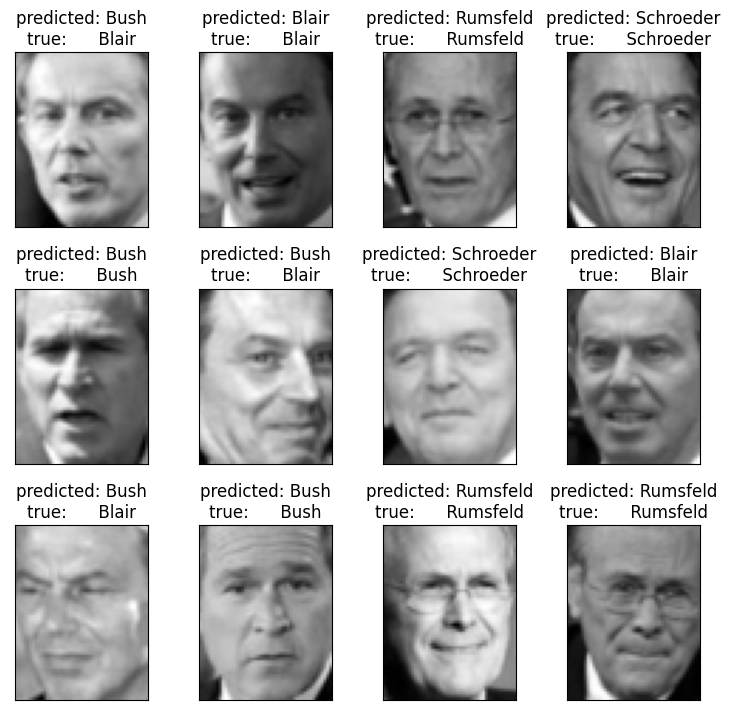

In [66]:
prediction_titles = [title(clf.predict(X_test), y_test, target_names, i)
                     for i in range(clf.predict(X_test).shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

plt.show()

In [70]:
# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, clf.predict(X_test))

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()


ValueError: multiclass format is not supported